In [1]:
import pandas as pd
df = pd.read_csv("../data/customer/customer.csv")
df.head()

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [2]:
cols=["Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls','Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins','Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge','CustServ Calls']
X=df[cols]
y=df['Churn']
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [3]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Churn'])
df_samp = pd.concat([X_samp, y_samp], axis=1)
df_samp['Churn'].value_counts()

0    483
1    483
Name: Churn, dtype: int64

In [4]:
X = df_samp[cols]
y = df_samp['Churn']

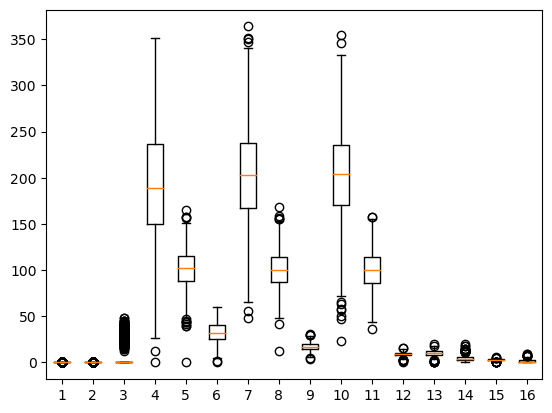

In [5]:
import matplotlib.pyplot as plt
plt.boxplot(X)
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))

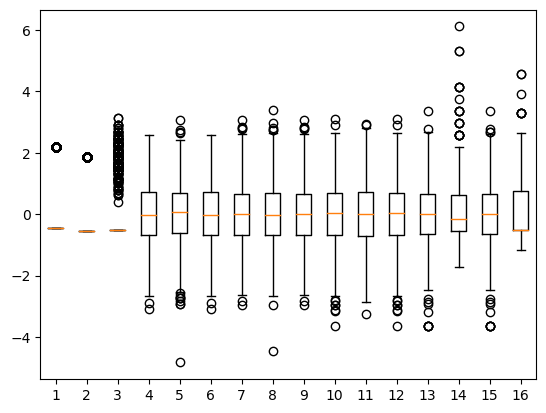

In [7]:
plt.boxplot(X_scaled)
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
import numpy as np

svm = SVC(random_state=0).fit(X, y)
# rf = RandomForestClassifier(random_state=0).fit(X, y)
# 모형을 만드는데 사용된 변수들의 특성 중요도 - 트리 알고리즘에 더욱 적합한 방법
result = permutation_importance(svm, X, y, n_repeats=10, random_state=0, n_jobs=-1)
importances = np.array(list(zip(X.columns, result.importances_mean)))
df2 = pd.DataFrame(importances)
df2

,0,1
0,Int'l Plan,0.0
1,VMail Plan,0.0
2,VMail Message,0.0023809523809523725
3,Day Mins,0.15186335403726708
4,Day Calls,0.0025879917184264854
5,Day Charge,0.00041407867494823724
6,Eve Mins,0.052380952380952375
7,Eve Calls,0.002277432712215344
8,Eve Charge,0.0008281573498964967
9,Night Mins,0.0025879917184264967


In [11]:
sorted_idx = result.importances_mean.argsort() # 오름차순
print(importances[sorted_idx[::-1]]) #넘파이 배열을 역순으로

[['Day Mins' '0.15186335403726708']
 ['Eve Mins' '0.052380952380952375']
 ['Intl Mins' '0.003209109730848847']
 ['Night Calls' '0.0026915113871635588']
 ['Night Mins' '0.0025879917184264967']
 ['Day Calls' '0.0025879917184264854']
 ['VMail Message' '0.0023809523809523725']
 ['Eve Calls' '0.002277432712215344']
 ['CustServ Calls' '0.001138716356107683']
 ['Intl Calls' '0.001138716356107683']
 ['Intl Charge' '0.0010351966873706209']
 ['Eve Charge' '0.0008281573498964967']
 ['Day Charge' '0.00041407867494823724']
 ['Night Charge' '0.0']
 ['VMail Plan' '0.0']
 ["Int'l Plan" '0.0']]
